# HDBSCAN

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pip install pyproj


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
data=pd.read_csv("/workspaces/master-thesis-declustering-using-ml/Unsupervised-ML/data/mld_final-nz_real_catalog.csv")
data.head()

,event,date,Time,latitude,longitude,depth,magnitude,DateTime,time,Year,...,Hour,Minute,Second,i+,N+,T+,R+,dm+,n_child,n_parent
0,2,1980-01-01,09:27:04.52,-40.490,174.66901,72.6,3.200,1980-01-01 09:27:04.520,0.099293,1980,...,9,27,4.52,0,0.000217,0.004731,0.045941,-0.633,0.082958,0.041479
1,3,1980-01-01,18:28:10.99,-37.630,176.38000,210.0,4.150,1980-01-01 18:28:10.990,0.475062,1980,...,18,28,10.99,1,0.001304,0.008451,0.154341,-0.950,0.124437,0.082958
2,4,1980-01-01,20:20:54.03,-40.290,173.42999,212.0,4.500,1980-01-01 20:20:54.030,0.553338,1980,...,20,20,54.03,2,0.000038,0.000571,0.066251,-0.350,0.165915,0.124437
3,5,1980-01-02,18:24:15.40,-38.480,176.75000,5.0,3.375,1980-01-02 18:24:15.400,1.472336,1980,...,18,24,15.40,2,0.000047,0.007270,0.006458,0.775,0.000000,0.124437
4,6,1980-01-04,01:21:41.06,-40.906,175.23700,24.1,2.750,1980-01-04 01:21:41.060,2.762216,1980,...,1,21,41.06,3,0.000144,0.010633,0.013547,1.750,0.041479,0.165915


In [4]:

from pyproj import Transformer
import hdbscan

df=data.copy()
df.head()


,event,date,Time,latitude,longitude,depth,magnitude,DateTime,time,Year,...,Hour,Minute,Second,i+,N+,T+,R+,dm+,n_child,n_parent
0,2,1980-01-01,09:27:04.52,-40.490,174.66901,72.6,3.200,1980-01-01 09:27:04.520,0.099293,1980,...,9,27,4.52,0,0.000217,0.004731,0.045941,-0.633,0.082958,0.041479
1,3,1980-01-01,18:28:10.99,-37.630,176.38000,210.0,4.150,1980-01-01 18:28:10.990,0.475062,1980,...,18,28,10.99,1,0.001304,0.008451,0.154341,-0.950,0.124437,0.082958
2,4,1980-01-01,20:20:54.03,-40.290,173.42999,212.0,4.500,1980-01-01 20:20:54.030,0.553338,1980,...,20,20,54.03,2,0.000038,0.000571,0.066251,-0.350,0.165915,0.124437
3,5,1980-01-02,18:24:15.40,-38.480,176.75000,5.0,3.375,1980-01-02 18:24:15.400,1.472336,1980,...,18,24,15.40,2,0.000047,0.007270,0.006458,0.775,0.000000,0.124437
4,6,1980-01-04,01:21:41.06,-40.906,175.23700,24.1,2.750,1980-01-04 01:21:41.060,2.762216,1980,...,1,21,41.06,3,0.000144,0.010633,0.013547,1.750,0.041479,0.165915


In [5]:

df.columns


Index(['event', 'date', 'Time', 'latitude', 'longitude', 'depth', 'magnitude',
       'DateTime', 'time', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'i+', 'N+', 'T+', 'R+', 'dm+', 'n_child', 'n_parent'],
      dtype='str')

In [6]:
df['eventdateTime'] = pd.to_datetime(df['DateTime'])

df = df.sort_values('eventdateTime').reset_index(drop=True)

Mc = 3.0
df = df[df['magnitude'] >= Mc].reset_index(drop=True)
df


,event,date,Time,latitude,longitude,depth,magnitude,DateTime,time,Year,...,Minute,Second,i+,N+,T+,R+,dm+,n_child,n_parent,eventdateTime
0,2,1980-01-01,09:27:04.52,-40.490000,174.669010,72.600000,3.200000,1980-01-01 09:27:04.520,0.099293,1980,...,27,4.52,0,0.000217,0.004731,4.594085e-02,-0.633000,0.082958,0.041479,1980-01-01 09:27:04.520
1,3,1980-01-01,18:28:10.99,-37.630000,176.380000,210.000000,4.150000,1980-01-01 18:28:10.990,0.475062,1980,...,28,10.99,1,0.001304,0.008451,1.543406e-01,-0.950000,0.124437,0.082958,1980-01-01 18:28:10.990
2,4,1980-01-01,20:20:54.03,-40.290000,173.429990,212.000000,4.500000,1980-01-01 20:20:54.030,0.553338,1980,...,20,54.03,2,0.000038,0.000571,6.625140e-02,-0.350000,0.165915,0.124437,1980-01-01 20:20:54.030
3,5,1980-01-02,18:24:15.40,-38.480000,176.750000,5.000000,3.375000,1980-01-02 18:24:15.400,1.472336,1980,...,24,15.40,2,0.000047,0.007270,6.458123e-03,0.775000,0.000000,0.124437,1980-01-02 18:24:15.400
4,7,1980-01-04,01:28:26.60,-36.660000,177.450000,221.000000,4.818000,1980-01-04 01:28:26.600,2.766910,1980,...,28,26.60,5,0.000085,0.000180,4.699059e-01,-2.068000,0.497746,0.041479,1980-01-04 01:28:26.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127055,396244,2024-12-30,23:41:29.14,-41.076080,175.034241,23.188284,3.401808,2024-12-30 23:41:29.140,16435.692634,2024,...,41,29.14,390123,0.000031,1.204461,2.550215e-05,1.268803,0.041479,1.161408,2024-12-30 23:41:29.140
127056,396248,2024-12-31,02:54:35.80,-38.738785,-179.703293,33.000000,3.138173,2024-12-31 02:54:35.800,16435.826738,2024,...,54,35.80,396240,0.000134,0.001787,7.476519e-02,0.932822,0.000000,0.041479,2024-12-31 02:54:35.800
127057,396252,2024-12-31,06:36:24.41,-33.089710,-179.512146,300.000000,4.744562,2024-12-31 06:36:24.410,16435.980773,2024,...,36,24.41,13906,0.000012,29.899942,4.156491e-07,0.409438,0.041479,0.124437,2024-12-31 06:36:24.410
127058,396261,2024-12-31,13:12:41.89,-32.353073,-179.300980,291.739777,3.700604,2024-12-31 13:12:41.890,16436.255976,2024,...,12,41.89,396251,0.000002,0.000991,2.352851e-03,1.043958,0.000000,0.041479,2024-12-31 13:12:41.890


## CONVERT LAT–LON → KM

In [7]:
lat0 = df['latitude'].mean()
lon0 = df['longitude'].mean()

transformer = Transformer.from_crs(
    "epsg:4326",
    f"+proj=aeqd +lat_0={lat0} +lon_0={lon0}",
    always_xy=True
)

x_m, y_m = transformer.transform(
    df['longitude'].values,
    df['latitude'].values
)

df['x_km'] = x_m / 1000.0
df['y_km'] = y_m / 1000.0

df.head()


,event,date,Time,latitude,longitude,depth,magnitude,DateTime,time,Year,...,i+,N+,T+,R+,dm+,n_child,n_parent,eventdateTime,x_km,y_km
0,2,1980-01-01,09:27:04.52,-40.49,174.66901,72.6,3.200,1980-01-01 09:27:04.520,0.099293,1980,...,0,0.000217,0.004731,0.045941,-0.633,0.082958,0.041479,1980-01-01 09:27:04.520,1666.738768,-266.553526
1,3,1980-01-01,18:28:10.99,-37.63,176.38000,210.0,4.150,1980-01-01 18:28:10.990,0.475062,1980,...,1,0.001304,0.008451,0.154341,-0.950,0.124437,0.082958,1980-01-01 18:28:10.990,1883.745443,12.474969
2,4,1980-01-01,20:20:54.03,-40.29,173.42999,212.0,4.500,1980-01-01 20:20:54.030,0.553338,1980,...,2,0.000038,0.000571,0.066251,-0.350,0.165915,0.124437,1980-01-01 20:20:54.030,1568.837589,-221.894123
3,5,1980-01-02,18:24:15.40,-38.48,176.75000,5.0,3.375,1980-01-02 18:24:15.400,1.472336,1980,...,2,0.000047,0.007270,0.006458,0.775,0.000000,0.124437,1980-01-02 18:24:15.400,1892.840618,-88.352556
4,7,1980-01-04,01:28:26.60,-36.66,177.45000,221.0,4.818,1980-01-04 01:28:26.600,2.766910,1980,...,5,0.000085,0.000180,0.469906,-2.068,0.497746,0.041479,1980-01-04 01:28:26.600,2001.756144,95.497253


## CONVERT TIME → CONTINUOUS VARIABLE (DAYS)

In [8]:
t0 = df['eventdateTime'].iloc[0]

df['time_days'] = (
    df['eventdateTime'] - t0
).dt.total_seconds() / (3600 * 24)

df


,event,date,Time,latitude,longitude,depth,magnitude,DateTime,time,Year,...,N+,T+,R+,dm+,n_child,n_parent,eventdateTime,x_km,y_km,time_days
0,2,1980-01-01,09:27:04.52,-40.490000,174.669010,72.600000,3.200000,1980-01-01 09:27:04.520,0.099293,1980,...,0.000217,0.004731,4.594085e-02,-0.633000,0.082958,0.041479,1980-01-01 09:27:04.520,1666.738768,-266.553526,0.000000
1,3,1980-01-01,18:28:10.99,-37.630000,176.380000,210.000000,4.150000,1980-01-01 18:28:10.990,0.475062,1980,...,0.001304,0.008451,1.543406e-01,-0.950000,0.124437,0.082958,1980-01-01 18:28:10.990,1883.745443,12.474969,0.375769
2,4,1980-01-01,20:20:54.03,-40.290000,173.429990,212.000000,4.500000,1980-01-01 20:20:54.030,0.553338,1980,...,0.000038,0.000571,6.625140e-02,-0.350000,0.165915,0.124437,1980-01-01 20:20:54.030,1568.837589,-221.894123,0.454045
3,5,1980-01-02,18:24:15.40,-38.480000,176.750000,5.000000,3.375000,1980-01-02 18:24:15.400,1.472336,1980,...,0.000047,0.007270,6.458123e-03,0.775000,0.000000,0.124437,1980-01-02 18:24:15.400,1892.840618,-88.352556,1.373043
4,7,1980-01-04,01:28:26.60,-36.660000,177.450000,221.000000,4.818000,1980-01-04 01:28:26.600,2.766910,1980,...,0.000085,0.000180,4.699059e-01,-2.068000,0.497746,0.041479,1980-01-04 01:28:26.600,2001.756144,95.497253,2.667617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127055,396244,2024-12-30,23:41:29.14,-41.076080,175.034241,23.188284,3.401808,2024-12-30 23:41:29.140,16435.692634,2024,...,0.000031,1.204461,2.550215e-05,1.268803,0.041479,1.161408,2024-12-30 23:41:29.140,1681.979911,-337.691348,16435.593341
127056,396248,2024-12-31,02:54:35.80,-38.738785,-179.703293,33.000000,3.138173,2024-12-31 02:54:35.800,16435.826738,2024,...,0.000134,0.001787,7.476519e-02,0.932822,0.000000,0.041479,2024-12-31 02:54:35.800,2183.494730,-198.047629,16435.727445
127057,396252,2024-12-31,06:36:24.41,-33.089710,-179.512146,300.000000,4.744562,2024-12-31 06:36:24.410,16435.980773,2024,...,0.000012,29.899942,4.156491e-07,0.409438,0.041479,0.124437,2024-12-31 06:36:24.410,2370.640834,412.973168,16435.881480
127058,396261,2024-12-31,13:12:41.89,-32.353073,-179.300980,291.739777,3.700604,2024-12-31 13:12:41.890,16436.255976,2024,...,0.000002,0.000991,2.352851e-03,1.043958,0.000000,0.041479,2024-12-31 13:12:41.890,2411.153591,488.029909,16436.156683


In [9]:
r0 = 10.0   # km  → typical aftershock zone
z0 = 10.0   # km  → seismogenic thickness
t0 = 5.0    # days → aftershock decay window


In [10]:
X = np.column_stack([
    df['x_km'] / r0,
    df['y_km'] / r0,
    df['depth'] / z0,
    df['time_days'] / t0
])


In [11]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,
    min_samples=30,
    metric='euclidean',
    cluster_selection_method='eom'
)

labels = clusterer.fit_predict(X)

df['cluster_id'] = labels
df['cluster_probability'] = clusterer.probabilities_


In [12]:
cluster_summary = []

for cid in sorted(df['cluster_id'].unique()):
    if cid == -1:
        continue

    cluster_events = df[df['cluster_id'] == cid]

    # index of mainshock (THIS IS THE KEY FIX)
    mainshock_idx = cluster_events['magnitude'].idxmax()

    cluster_summary.append({
        'cluster_id': cid,
        'mainshock_idx': mainshock_idx,
        'mainshock_time': df.loc[mainshock_idx, 'eventdateTime'],
        'mainshock_mag': df.loc[mainshock_idx, 'magnitude'],
        'cluster_size': len(cluster_events)
    })

cluster_summary = pd.DataFrame(cluster_summary)


In [13]:
mainshock_indices = cluster_summary['mainshock_idx'].values

mainshocks = df.loc[mainshock_indices]


In [14]:
background = df[df['cluster_id'] == -1]

declustered = pd.concat([background, mainshocks])
declustered = declustered.sort_values('eventdateTime').reset_index(drop=True)


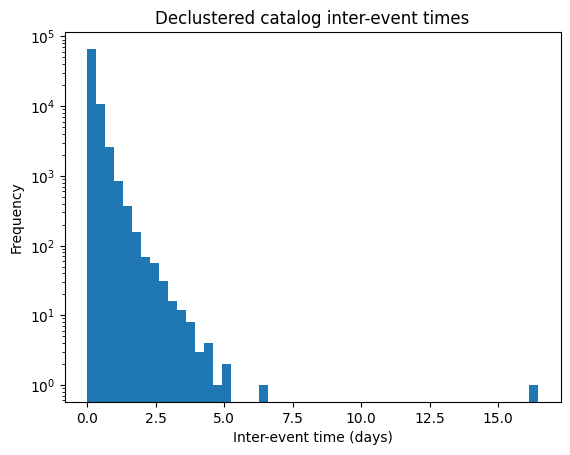

In [15]:
dt = np.diff(declustered['time_days'])

plt.hist(dt, bins=50, log=True)
plt.xlabel("Inter-event time (days)")
plt.ylabel("Frequency")
plt.title("Declustered catalog inter-event times")
plt.show()


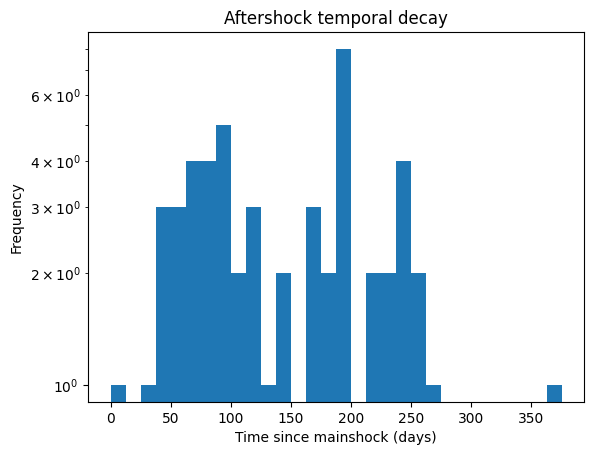

In [16]:
cid = cluster_summary.iloc[0]['cluster_id']
cluster = df[df['cluster_id'] == cid]

t_main = cluster['time_days'].min()
dt = cluster['time_days'] - t_main

plt.hist(dt, bins=30, log=True)
plt.xlabel("Time since mainshock (days)")
plt.ylabel("Frequency")
plt.title("Aftershock temporal decay")
plt.show()


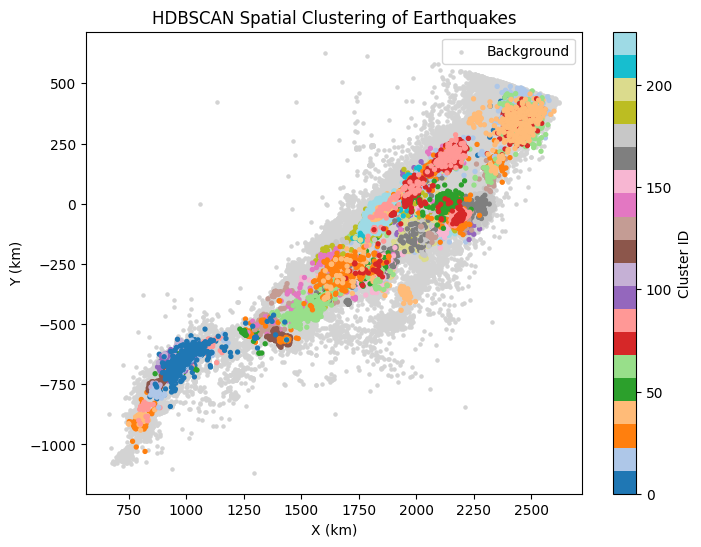

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 6))

# Background events
bg = df[df['cluster_id'] == -1]
plt.scatter(
    bg['x_km'], bg['y_km'],
    s=5, c='lightgrey', label='Background'
)

# Clustered events
clusters = df[df['cluster_id'] != -1]
scatter = plt.scatter(
    clusters['x_km'], clusters['y_km'],
    c=clusters['cluster_id'],
    s=8, cmap='tab20'
)

plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.title("HDBSCAN Spatial Clustering of Earthquakes")
plt.colorbar(scatter, label="Cluster ID")
plt.legend()
plt.show()


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# ASSUMPTIONS
# -------------------------------
# df already contains:
# - 'cluster_id'  (HDBSCAN labels, -1 = background)
# - 'magnitude'
# - 'eventdateTime' (optional)

# -------------------------------
# 1. IDENTIFY CLUSTERS
# -------------------------------
cluster_ids = df['cluster_id'].unique()
cluster_ids = cluster_ids[cluster_ids != -1]   # remove background label

n_clusters = len(cluster_ids)

# -------------------------------
# 2. IDENTIFY MAINSHOCKS
# -------------------------------
mainshock_indices = []

for cid in cluster_ids:
    cluster_events = df[df['cluster_id'] == cid]
    mainshock_idx = cluster_events['magnitude'].idxmax()
    mainshock_indices.append(mainshock_idx)

mainshocks = df.loc[mainshock_indices]
n_mainshocks = len(mainshocks)

# -------------------------------
# 3. COUNT AFTERSHOCKS
# -------------------------------
total_clustered_events = (df['cluster_id'] != -1).sum()
n_aftershocks = total_clustered_events - n_mainshocks

# -------------------------------
# 4. COUNT BACKGROUND EVENTS
# -------------------------------
n_background = (df['cluster_id'] == -1).sum()

# -------------------------------
# 5. CONSISTENCY CHECK
# -------------------------------
assert (
    n_background + n_mainshocks + n_aftershocks == len(df)
), "Event count mismatch!"

# -------------------------------
# 6. CALCULATE PERCENTAGES
# -------------------------------
total_events = len(df)

pct_background = 100 * n_background / total_events
pct_mainshocks = 100 * n_mainshocks / total_events
pct_aftershocks = 100 * n_aftershocks / total_events

# -------------------------------
# 7. SUMMARY TABLE (COUNT + %)
# -------------------------------
summary = pd.DataFrame({
    "Category": [
        "Total events",
        "Background events",
        "Mainshocks",
        "Aftershocks",
        "Aftershock clusters"
    ],
    "Count": [
        total_events,
        n_background,
        n_mainshocks,
        n_aftershocks,
        n_clusters
    ],
    "Percentage (%)": [
        100.0,
        pct_background,
        pct_mainshocks,
        pct_aftershocks,
        None
    ]
})

print(summary)


              Category   Count  Percentage (%)
0         Total events  127060      100.000000
1    Background events   80843       63.625846
2           Mainshocks     227        0.178656
3          Aftershocks   45990       36.195498
4  Aftershock clusters     227             NaN


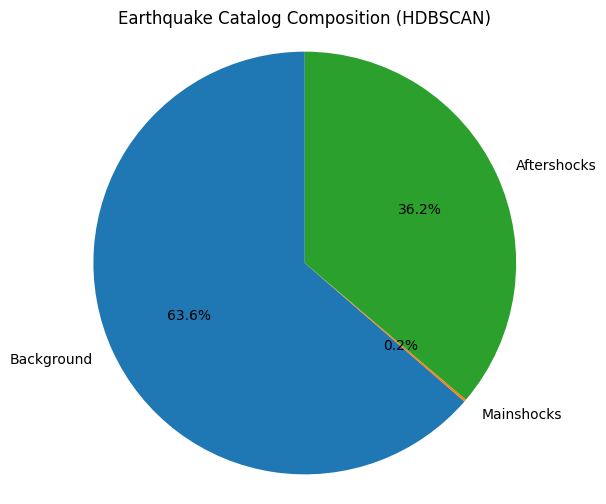

In [23]:
labels = ['Background', 'Mainshocks', 'Aftershocks']
sizes = [n_background, n_mainshocks, n_aftershocks]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Earthquake Catalog Composition (HDBSCAN)")
plt.axis('equal')  # makes it a circle
plt.show()


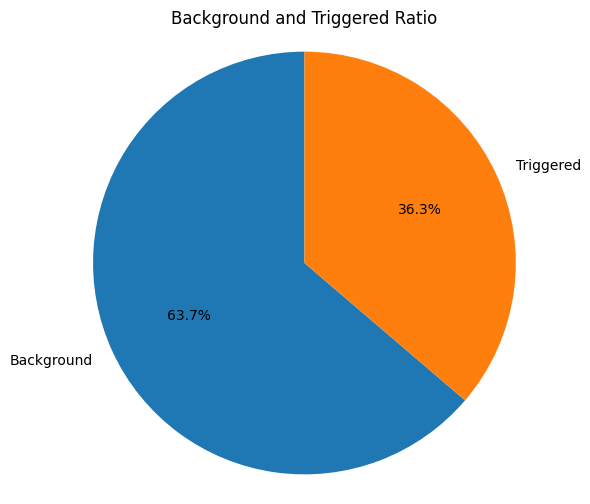

In [28]:
labels = ['Background', 'Triggered']
sizes = [n_background, n_aftershocks]

plt.figure(figsize=(6, 6))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Background and Triggered Ratio")
plt.axis('equal')
plt.show()


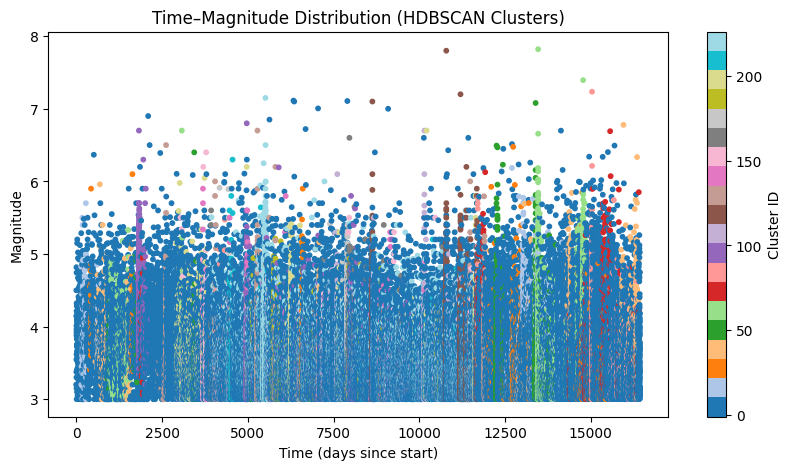

In [30]:
plt.figure(figsize=(10, 5))

plt.scatter(
    df['time_days'],
    df['magnitude'],
    c=df['cluster_id'],
    cmap='tab20',
    s=10
)

plt.xlabel("Time (days since start)")
plt.ylabel("Magnitude")
plt.title("Time–Magnitude Distribution (HDBSCAN Clusters)")
plt.colorbar(label="Cluster ID")
plt.show()


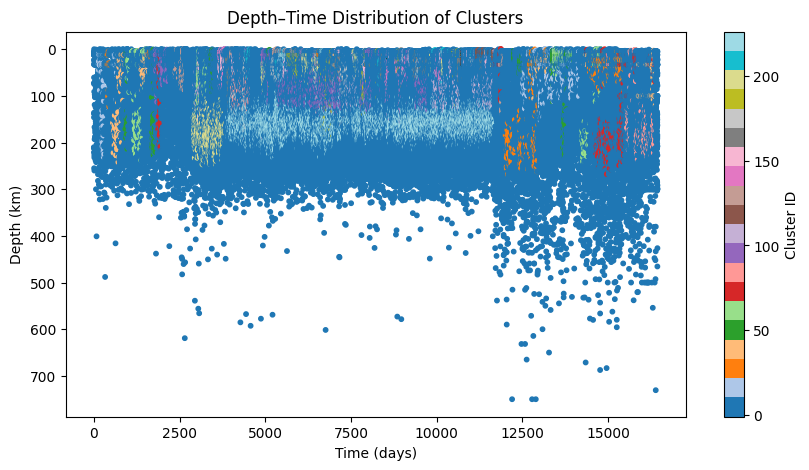

In [36]:
plt.figure(figsize=(10, 5))

plt.scatter(
    df['time_days'],
    df['depth'],
    c=df['cluster_id'],
    cmap='tab20',
    s=10
)

plt.gca().invert_yaxis()  # depth increases downward
plt.xlabel("Time (days)")
plt.ylabel("Depth (km)")
plt.title("Depth–Time Distribution of Clusters")
plt.colorbar(label="Cluster ID")
plt.show()


In [31]:
largest_cluster_id = (
    cluster_summary
    .sort_values('cluster_size', ascending=False)
    .iloc[0]['cluster_id']
)

cluster = df[df['cluster_id'] == largest_cluster_id]


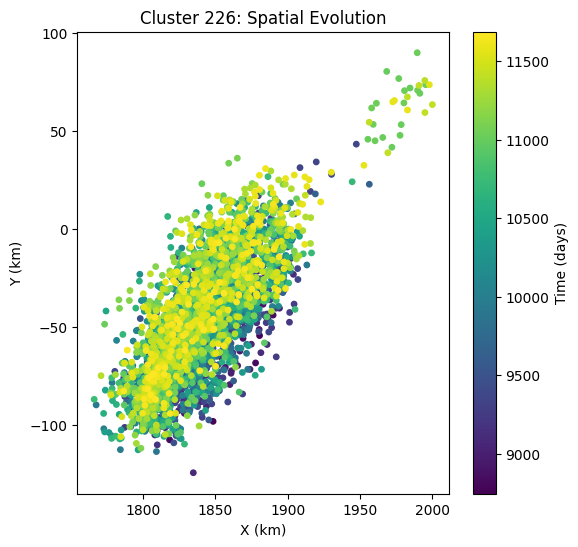

In [32]:
plt.figure(figsize=(6, 6))

plt.scatter(
    cluster['x_km'], cluster['y_km'],
    c=cluster['time_days'],
    cmap='viridis',
    s=15
)

plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.title(f"Cluster {largest_cluster_id}: Spatial Evolution")
plt.colorbar(label="Time (days)")
plt.show()


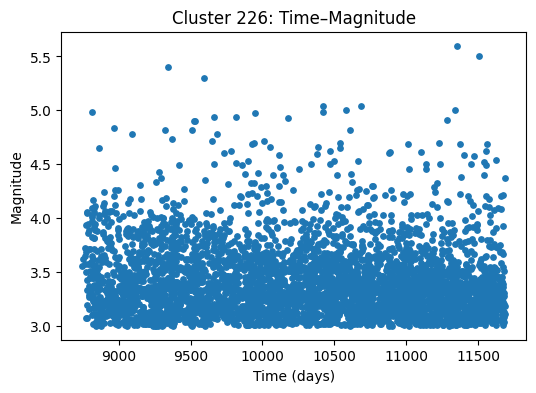

In [33]:
plt.figure(figsize=(6, 4))

plt.scatter(
    cluster['time_days'],
    cluster['magnitude'],
    s=15
)

plt.xlabel("Time (days)")
plt.ylabel("Magnitude")
plt.title(f"Cluster {largest_cluster_id}: Time–Magnitude")
plt.show()


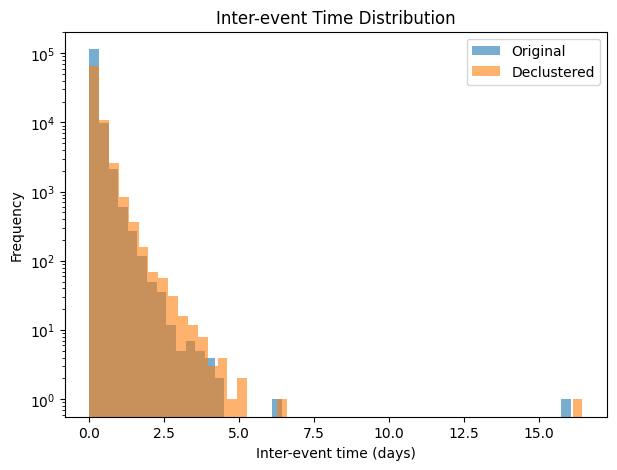

In [40]:
# Original catalog
dt_all = np.diff(df['time_days'])

# Declustered catalog
dt_declust = np.diff(declustered['time_days'])

plt.figure(figsize=(7, 5))

plt.hist(dt_all, bins=50, alpha=0.6, label='Original', log=True)
plt.hist(dt_declust, bins=50, alpha=0.6, label='Declustered', log=True)

plt.xlabel("Inter-event time (days)")
plt.ylabel("Frequency")
plt.legend()
plt.title("Inter-event Time Distribution")
plt.show()


# Test on whole dataset

In [34]:
# ============================================================
# HDBSCAN-BASED EARTHQUAKE DECLUSTERING (FULL SCRIPT)
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyproj import Transformer
import hdbscan

# ============================================================
# 1. LOAD EARTHQUAKE CATALOG
# ============================================================

# Replace with your file path
df = pd.read_csv("/workspaces/master-thesis-declustering-using-ml/Unsupervised-ML/data/mld_final-nz_real_catalog.csv")

# Required columns:
# eventdateTime, latitude, longitude, depth, magnitude

df['eventdateTime'] = pd.to_datetime(df['DateTime'])
df = df.sort_values('eventdateTime').reset_index(drop=True)

print("Total events (raw):", len(df))


Total events (raw): 396267


In [ ]:

# ============================================================
# 2. MAGNITUDE OF COMPLETENESS (Mc)
# ============================================================

Mc = 2.0   # <-- replace with your estimated Mc
df = df[df['magnitude'] >= Mc].reset_index(drop=True)

print("Events after Mc filtering:", len(df))

Events after Mc filtering: 396267


: 

In [ ]:


# ============================================================
# 3. LAT–LON → CARTESIAN (km)
# ============================================================

lat0 = df['latitude'].mean()
lon0 = df['longitude'].mean()

transformer = Transformer.from_crs(
    "epsg:4326",
    f"+proj=aeqd +lat_0={lat0} +lon_0={lon0}",
    always_xy=True
)

x_m, y_m = transformer.transform(
    df['longitude'].values,
    df['latitude'].values
)

df['x_km'] = x_m / 1000.0
df['y_km'] = y_m / 1000.0

# ============================================================
# 4. TIME → CONTINUOUS VARIABLE (days)
# ============================================================

t0 = df['eventdateTime'].iloc[0]
df['time_days'] = (
    df['eventdateTime'] - t0
).dt.total_seconds() / (3600 * 24)

# ============================================================
# 5. PHYSICAL SCALING (SPACE–TIME–DEPTH)
# ============================================================

r0 = 10.0   # km
z0 = 10.0   # km
t0 = 5.0    # days

X = np.column_stack([
    df['x_km'] / r0,
    df['y_km'] / r0,
    df['depth'] / z0,
    df['time_days'] / t0
])

# ============================================================
# 6. RUN HDBSCAN
# ============================================================

clusterer = hdbscan.HDBSCAN(
    min_cluster_size=30,
    min_samples=30,
    metric='euclidean',
    cluster_selection_method='eom'
)

df['cluster_id'] = clusterer.fit_predict(X)
df['cluster_probability'] = clusterer.probabilities_

# ============================================================
# 7. IDENTIFY CLUSTERS & MAINSHOCKS
# ============================================================

cluster_ids = df['cluster_id'].unique()
cluster_ids = cluster_ids[cluster_ids != -1]  # remove background

n_clusters = len(cluster_ids)

mainshock_indices = []

for cid in cluster_ids:
    cluster_events = df[df['cluster_id'] == cid]
    mainshock_idx = cluster_events['magnitude'].idxmax()
    mainshock_indices.append(mainshock_idx)

mainshocks = df.loc[mainshock_indices]
n_mainshocks = len(mainshocks)

# ============================================================
# 8. COUNT AFTERSHOCKS & BACKGROUND
# ============================================================

total_clustered_events = (df['cluster_id'] != -1).sum()
n_aftershocks = total_clustered_events - n_mainshocks
n_background = (df['cluster_id'] == -1).sum()

# Consistency check
assert (
    n_background + n_mainshocks + n_aftershocks == len(df)
), "Event count mismatch!"

# ============================================================
# 9. PERCENTAGES
# ============================================================

total_events = len(df)

pct_background = 100 * n_background / total_events
pct_mainshocks = 100 * n_mainshocks / total_events
pct_aftershocks = 100 * n_aftershocks / total_events

# ============================================================
# 10. SUMMARY TABLE
# ============================================================

summary = pd.DataFrame({
    "Category": [
        "Total events",
        "Background events",
        "Mainshocks",
        "Aftershocks",
        "Aftershock clusters"
    ],
    "Count": [
        total_events,
        n_background,
        n_mainshocks,
        n_aftershocks,
        n_clusters
    ],
    "Percentage (%)": [
        100.0,
        pct_background,
        pct_mainshocks,
        pct_aftershocks,
        None
    ]
})

print("\nDECLUSTERING SUMMARY\n")
print(summary)

# ============================================================
# 11. PIE CHARTS
# ============================================================

# Pie 1: Background vs Mainshocks vs Aftershocks
plt.figure(figsize=(6, 6))
plt.pie(
    [n_background, n_mainshocks, n_aftershocks],
    labels=['Background', 'Mainshocks', 'Aftershocks'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Earthquake Catalog Composition (HDBSCAN)")
plt.axis('equal')
plt.show()

# Pie 2: Mainshocks vs Aftershocks
plt.figure(figsize=(6, 6))
plt.pie(
    [n_mainshocks, n_aftershocks],
    labels=['Mainshocks', 'Aftershocks'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Mainshock–Aftershock Ratio")
plt.axis('equal')
plt.show()

# ============================================================
# 12. SPATIAL CLUSTER PLOT
# ============================================================

plt.figure(figsize=(8, 6))

bg = df[df['cluster_id'] == -1]
plt.scatter(bg['x_km'], bg['y_km'], s=5, c='lightgrey', label='Background')

clusters = df[df['cluster_id'] != -1]
sc = plt.scatter(
    clusters['x_km'], clusters['y_km'],
    c=clusters['cluster_id'],
    s=8, cmap='tab20'
)

plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.title("HDBSCAN Spatial Clustering of Earthquakes")
plt.colorbar(sc, label="Cluster ID")
plt.legend()
plt.show()

# ============================================================
# 13. SAVE OUTPUT FILES
# ============================================================

df.to_csv("hdbscan_clustered_catalog.csv", index=False)
mainshocks.to_csv("hdbscan_mainshocks.csv", index=False)
summary.to_csv("hdbscan_summary.csv", index=False)

print("\nAll outputs saved successfully.")


# Cross verification of results of XGB AND HDBSCAN

XGB events: 130696
HDBSCAN events: 127060
Matched events: 54832

Overall agreement: 62.67%

Confusion Matrix (XGB vs HDBSCAN)
[[27782 13719]
 [ 6750  6581]]

Classification Report (XGB as reference):

              precision    recall  f1-score   support

  Background       0.80      0.67      0.73     41501
   Triggered       0.32      0.49      0.39     13331

    accuracy                           0.63     54832
   macro avg       0.56      0.58      0.56     54832
weighted avg       0.69      0.63      0.65     54832


SUMMARY

               Category  Count / Value
0  Total matched events       54832.00
1        XGB background       41501.00
2         XGB triggered       13331.00
3    HDBSCAN background       34532.00
4     HDBSCAN triggered       20300.00
5         Agreement (%)          62.67

Disagreeing events: 20469


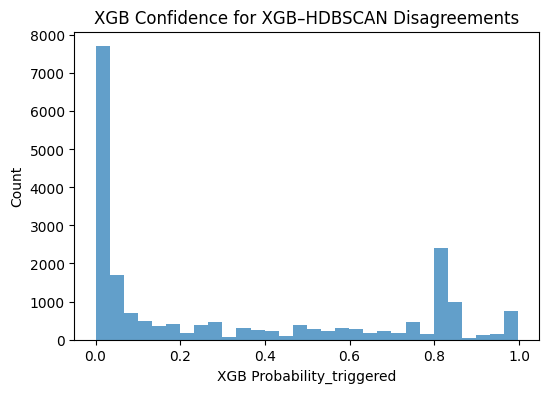

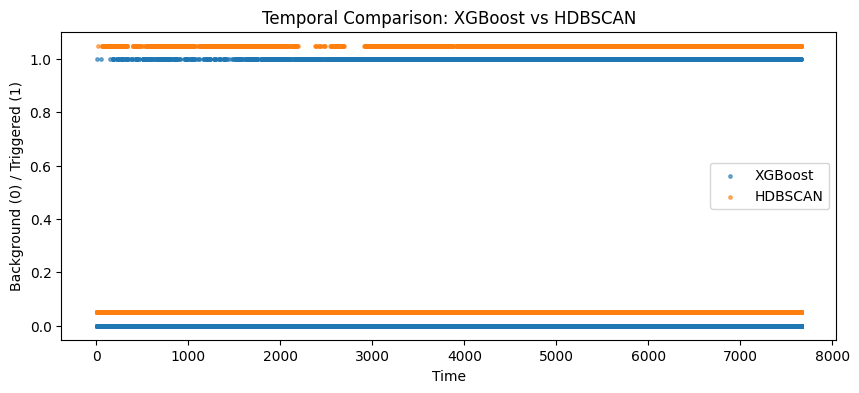

In [ ]:
# ============================================================
# CROSS VERIFICATION: XGBOOST vs HDBSCAN DECLUSTERING
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# ============================================================
# 1. LOAD DATA
# ============================================================

# XGBoost declustered catalog (supervised)
df_xgb = pd.read_csv("/workspaces/master-thesis-declustering-using-ml/Unsupervised-ML/data/xgb_real_data_predictions_gb.csv")

# HDBSCAN declustered catalog (unsupervised)
df_hdb = pd.read_csv("hdbscan_clustered_catalog.csv")

print("XGB events:", len(df_xgb))
print("HDBSCAN events:", len(df_hdb))

# ============================================================
# 2. ALIGN EVENTS (VERY IMPORTANT)
# ============================================================
# Use robust spatio-temporal-magnitude key

key_cols = ['DateTime', 'latitude', 'longitude', 'depth', 'magnitude']

for col in key_cols:
    df_xgb[col] = df_xgb[col].astype(str)
    df_hdb[col] = df_hdb[col].astype(str)

df = pd.merge(
    df_xgb,
    df_hdb[['cluster_id'] + key_cols],
    on=key_cols,
    how='inner'
)

print("Matched events:", len(df))

# ============================================================
# 3. CREATE COMMON BINARY LABELS
# ============================================================

# XGB label: already provided
# 0 = background, 1 = triggered
df['label_xgb'] = df['Predicted_Label']

# HDBSCAN label
# cluster_id = -1 → background (0)
# cluster_id >= 0 → triggered (1)
df['label_hdbscan'] = np.where(df['cluster_id'] == -1, 0, 1)

# ============================================================
# 4. BASIC AGREEMENT METRIC
# ============================================================

agreement = (df['label_xgb'] == df['label_hdbscan']).mean()

print(f"\nOverall agreement: {agreement*100:.2f}%")

# ============================================================
# 5. CONFUSION MATRIX
# ============================================================

cm = confusion_matrix(df['label_xgb'], df['label_hdbscan'])

print("\nConfusion Matrix (XGB vs HDBSCAN)")
print(cm)

# Layout:
# [[XGB bg & HDB bg, XGB bg & HDB trig],
#  [XGB trig & HDB bg, XGB trig & HDB trig]]

# ============================================================
# 6. CLASSIFICATION REPORT (RELATIVE AGREEMENT)
# ============================================================

print("\nClassification Report (XGB as reference):\n")
print(
    classification_report(
        df['label_xgb'],
        df['label_hdbscan'],
        target_names=['Background', 'Triggered']
    )
)

# ============================================================
# 7. SUMMARY COUNTS
# ============================================================

summary = pd.DataFrame({
    "Category": [
        "Total matched events",
        "XGB background",
        "XGB triggered",
        "HDBSCAN background",
        "HDBSCAN triggered",
        "Agreement (%)"
    ],
    "Count / Value": [
        len(df),
        (df['label_xgb'] == 0).sum(),
        (df['label_xgb'] == 1).sum(),
        (df['label_hdbscan'] == 0).sum(),
        (df['label_hdbscan'] == 1).sum(),
        round(agreement * 100, 2)
    ]
})

print("\nSUMMARY\n")
print(summary)

# ============================================================
# 8. PROBABILITY-BASED DISAGREEMENT ANALYSIS
# ============================================================

disagree = df[df['label_xgb'] != df['label_hdbscan']]

print("\nDisagreeing events:", len(disagree))

plt.figure(figsize=(6, 4))
plt.hist(
    disagree['Probability_triggered'].astype(float),
    bins=30,
    alpha=0.7
)
plt.xlabel("XGB Probability_triggered")
plt.ylabel("Count")
plt.title("XGB Confidence for XGB–HDBSCAN Disagreements")
plt.show()

# ============================================================
# 9. TEMPORAL COMPARISON PLOT
# ============================================================

plt.figure(figsize=(10, 4))

plt.scatter(
    df['time'].astype(float),
    df['label_xgb'],
    s=6,
    alpha=0.6,
    label='XGBoost'
)

plt.scatter(
    df['time'].astype(float),
    df['label_hdbscan'] + 0.05,
    s=6,
    alpha=0.6,
    label='HDBSCAN'
)

plt.xlabel("Time")
plt.ylabel("Background (0) / Triggered (1)")
plt.title("Temporal Comparison: XGBoost vs HDBSCAN")
plt.legend()
plt.show()

# ============================================================
# 10. SAVE OUTPUTS
# ============================================================

# df.to_csv("xgb_hdbscan_cross_verified.csv", index=False)
# summary.to_csv("xgb_hdbscan_cross_verification_summary.csv", index=False)

# print("\nCross-verification outputs saved successfully.")


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(df['label_xgb'], df['label_hdbscan'])


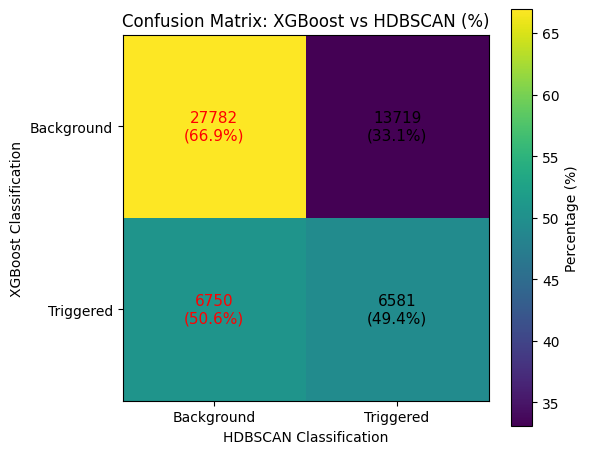

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --------------------------------
# Confusion matrix values
# --------------------------------
cm = confusion_matrix(df['label_xgb'], df['label_hdbscan'])

# Convert to percentages (row-wise)
cm_percent = cm / cm.sum(axis=1, keepdims=True) * 100

labels = ['Background', 'Triggered']

# --------------------------------
# Plot
# --------------------------------
fig, ax = plt.subplots(figsize=(6, 5))

im = ax.imshow(cm_percent)

# Axis ticks & labels
ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

ax.set_xlabel("HDBSCAN Classification")
ax.set_ylabel("XGBoost Classification")
ax.set_title("Confusion Matrix: XGBoost vs HDBSCAN (%)")

# --------------------------------
# Annotate cells (count + %)
# --------------------------------
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        text = (
            f"{cm[i, j]}\n"
            f"({cm_percent[i, j]:.1f}%)"
        )
        ax.text(
            j, i, text,
            ha="center", va="center",
            fontsize=11,
            color="red" if cm_percent[i, j] > 50 else "black"
        )

# --------------------------------
# Colorbar
# --------------------------------
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Percentage (%)")

plt.tight_layout()
plt.show()  
